<a href="https://colab.research.google.com/github/AndreaCamilloni/NAML_ex_sessions/blob/main/03_PCA_application.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PCA's application in Genomics
How we can extract knowledge from the genes' of patients to diagnose cancer.

**Real database** (thin and tall)

*   216 columns : 216 patients (121 w/ cancer and 95 normal)
*   2000 rows : 2000 features which represent the intensity of gens
*   **grp** variable contains the labels associated w/ the patients (Cancer or Normal)



We will use **PCA** to find the combinations among features to simplify our database

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

cancer_obs_path = 'drive/My Drive/Numerical Analysis/LAB01 - SVD and PCA/data/ovariancancer_obs.csv'
cancer_grp_path = 'drive/My Drive/Numerical Analysis/LAB01 - SVD and PCA/data/ovariancancer_grp.csv'

A = np.genfromtxt(cancer_obs_path, delimiter=',').transpose()
f = open(cancer_grp_path)
grp = np.array(f.read().split("\n"))
grp = grp[grp != '']

In [ ]:
A.shape, grp.shape

((4000, 216), (216,))

In [ ]:
print("%d patients" % A.shape[1])
print("%d features" % A.shape[0])
print("%d patients w/ cancer" % grp[grp=='Cancer'].shape)
print("%d patients normal" % grp[grp=='Normal'].shape)

216 patients
4000 features
121 patients w/ cancer
95 patients normal


**Scatter plot** of two proteins for patients w/ and w/out cancer

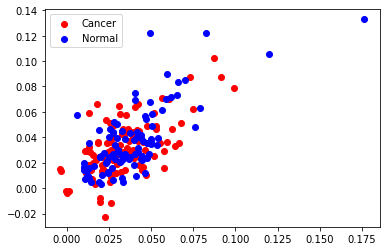

In [ ]:
plt.scatter(A[0,grp=='Cancer'], A[1,grp=='Cancer'], color='Red', label="Cancer")
plt.scatter(A[0,grp=='Normal'], A[1,grp=='Normal'], color='Blue', label="Normal")
plt.legend()

**Scatter plot** of three proteins

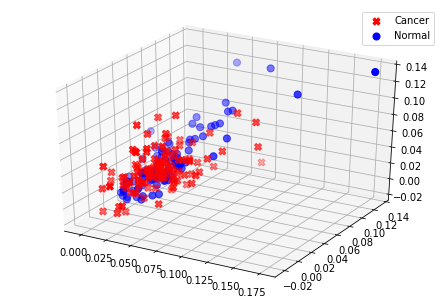

In [ ]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(A[0,grp=='Cancer'], A[1,grp=='Cancer'],A[2,grp=='Cancer'], color='Red', label="Cancer", marker = "X", s=50)
ax.scatter(A[0,grp=='Normal'], A[1,grp=='Normal'], A[1,grp=='Normal'],color='Blue', label="Normal",  marker = "o", s=50)
#ax.view_init(20,25)
ax.legend()

# Principal Component Analysis

Plot the **trend** of
- the singular values $\sigma_k$
- the cumulate fraction of singular values: $\frac{\sum_{i=1}^{k} \sigma_i}{\sum_{i=1}^{q} \sigma_i}$
- the fraction of the "explained variance": $\frac{\sum_{i=1}^{k} \sigma_i^2}{\sum_{i=1}^{q} \sigma_i^2}$

In [ ]:
#SVD
U,s,VT = np.linalg.svd(A, full_matrices=False)
U.shape,s.shape,VT.shape

((4000, 216), (216,), (216, 216))

In [ ]:
S = np.diag(s)
S.shape
A_svd = U @ S @ VT
error = np.mean(A - A_svd)

-1.5267145833784142e-17

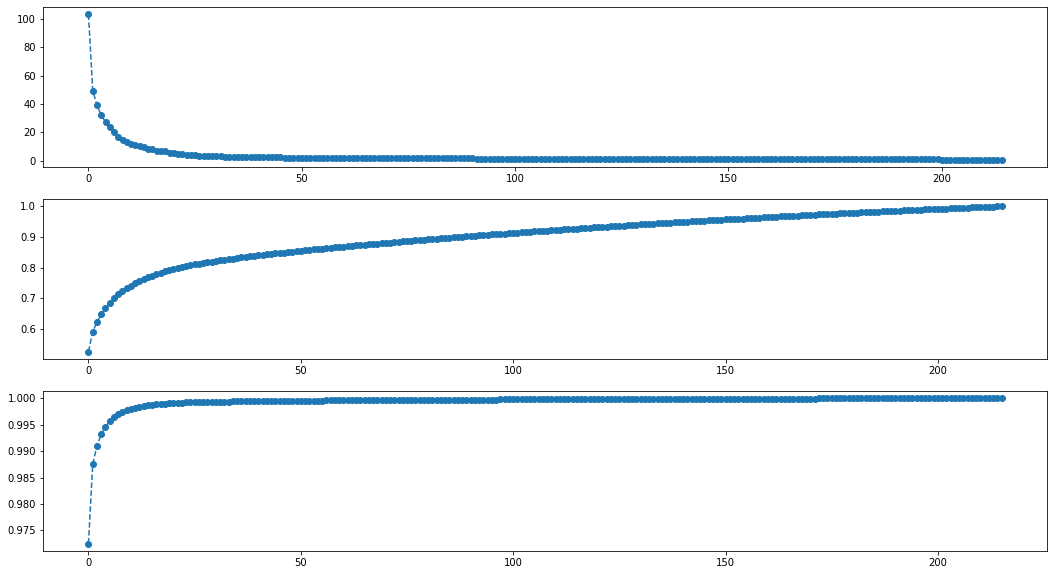

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(18,10),)
axs[0].plot(s[1:], 'o--')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o--')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o--')

In [ ]:
#PCA
U, s, VT = np.linalg.svd(A - np.mean(A, axis = 1 )[:,None], full_matrices=False)

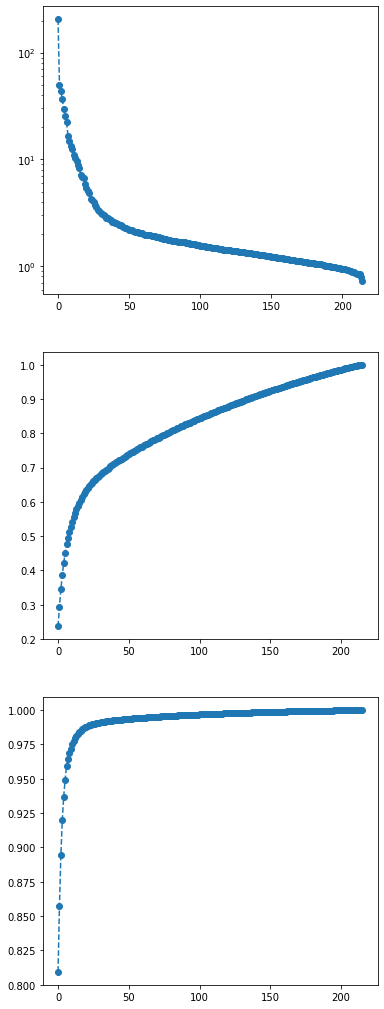

In [ ]:
fig, axs = plt.subplots(3,1, figsize=(6,18),)
axs[0].semilogy(s[:-1], 'o--')
axs[1].plot(np.cumsum(s)/np.sum(s), 'o--')
axs[2].plot(np.cumsum(s**2)/np.sum(s**2), 'o--')

**Scatterplot** of the first two principal components of the patients.

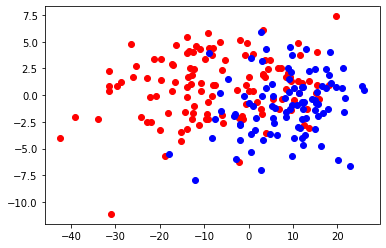

In [ ]:
for i_patient in range(A.shape[1]):
  col = 'red' if grp[i_patient] == 'Cancer' else 'blue'
  pc1 = np.inner(U[:,0],A[:,i_patient] - np.mean(A, axis = 1))
  pc2 = np.inner(U[:,1],A[:,i_patient] - np.mean(A, axis = 1))
  plt.scatter(pc1, pc2, color=col)

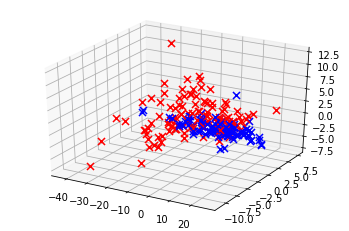

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i_patient in range(A.shape[1]):
  col = 'red' if grp[i_patient] == 'Cancer' else 'blue'
  pc1 = np.inner(U[:,0],A[:,i_patient] - np.mean(A, axis = 1))
  pc2 = np.inner(U[:,1],A[:,i_patient] - np.mean(A, axis = 1))
  pc3 = np.inner(U[:,2],A[:,i_patient] - np.mean(A, axis = 1))
  ax.scatter(pc1, pc2,pc3, color=col, s=50, marker='x')

